<a href="https://colab.research.google.com/github/alixa2003/Arch-Internship-Tasks/blob/main/MNIST_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MNIST DIGIT RECOGNITION**

**Objective**

The objective of this task was to build a machine learning model capable of recognizing handwritten digits from 0 to 9. The task aimed to understand image-based classification, data preprocessing for images, model training, evaluation, and prediction using both test data and user-drawn inputs.

##**Importing Libraries**

###**Dataset Description**

The MNIST Handwritten Digits dataset was used for this task. It is a widely used benchmark dataset in machine learning and computer vision.

The dataset contains:

* 60,000 training images

* 10,000 testing images

* Each image is of size 28 × 28 pixels

* Each image represents a handwritten digit from 0 to 9

The dataset was loaded directly using the Keras library.

In [1]:
import numpy as np
import cv2

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import gradio as gr


##**Loading and Preprocessing of Data**

Before training the model, the images were preprocessed to make them suitable for learning:

* Pixel values were normalized from the range 0–255 to 0–1

* Images were reshaped to include a single grayscale channel

* Labels were converted into categorical format for multi-class classification

For user-drawn images, additional preprocessing was applied:

* Conversion to grayscale

* Color inversion to match MNIST format

* Resizing to 28 × 28 pixels

* Normalization and reshaping for model input

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train = X_train / 255.0
X_test = X_test / 255.0


X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


##**Visualizing the digits**

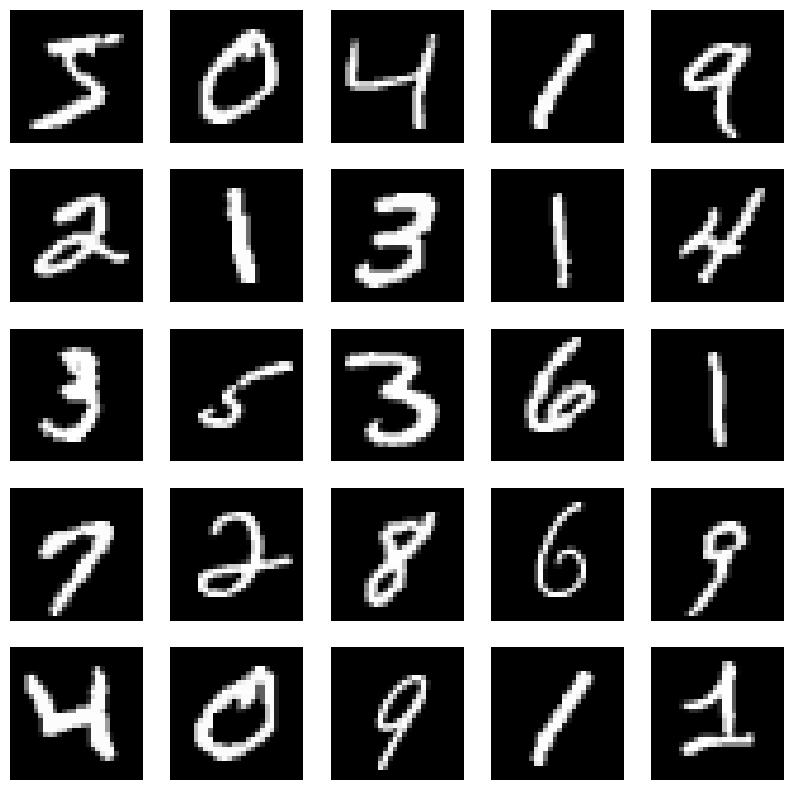

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.axis('off')
plt.show()

#**Model Architecture**

A Convolutional Neural Network (CNN) was used for digit recognition, as CNNs are well suited for image-based tasks.

The model architecture included:

* Convolution layers for feature extraction

* Max pooling layers for dimensionality reduction

* Fully connected dense layers for classification

* Softmax activation for multi-class output

The model was trained using the Adam optimizer and categorical cross-entropy loss.

In [6]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


#**Model Training**

The CNN model was trained on the MNIST training dataset for multiple epochs with a validation split. During training, the model learned important visual features such as edges, curves, and shapes that distinguish different digits.

In [8]:
model.fit(
    X_train,
    y_train_cat,
    validation_split=0.1,
    epochs=5,
    batch_size=128
)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8554 - loss: 0.5041 - val_accuracy: 0.9812 - val_loss: 0.0622
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9817 - loss: 0.0635 - val_accuracy: 0.9875 - val_loss: 0.0472
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9886 - loss: 0.0379 - val_accuracy: 0.9900 - val_loss: 0.0371
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9909 - loss: 0.0292 - val_accuracy: 0.9907 - val_loss: 0.0349
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9915 - loss: 0.0252 - val_accuracy: 0.9900 - val_loss: 0.0395


#**Model Evaluation**

After training, the model was evaluated on the MNIST test dataset. The evaluation metrics included:

* Accuracy

* Classification report

* Confusion matrix

The trained CNN achieved very high accuracy on the test data, demonstrating its effectiveness in recognizing handwritten digits.

In [9]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9871 - loss: 0.0373
Test Accuracy: 0.9891999959945679


In [10]:
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.97      0.98      1032
           3       0.99      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      1.00      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



#**Saving The Model**

In [11]:
model.save("mnist_cnn_model.h5")

In [12]:
cnn_model = load_model("mnist_cnn_model.h5")

#**Prediction and Deployment**

The trained model was tested in two ways:

* Without a user interface
The model successfully predicted digits from unseen MNIST test images, and results were visualized along with true labels and prediction confidence.

* With a user interface
A Gradio-based interface was implemented that allows users to draw digits on a canvas. The drawn image is preprocessed and passed to the trained CNN model, which predicts the digit along with a confidence score.

In [13]:
def preprocess_image(image):
    image = np.array(image)

    # Convert to grayscale
    if image.ndim == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Invert colors
    image = 255 - image

    # Resize to 28x28
    image = cv2.resize(image, (28, 28))

    # Normalize
    image = image / 255.0

    # Reshape for CNN
    image = image.reshape(1, 28, 28, 1)
    return image


In [14]:
def predict_digit(data):
    if data is None:
        return "Please draw a digit."

    image = data["composite"]
    processed = preprocess_image(image)

    prediction = cnn_model.predict(processed)
    digit = np.argmax(prediction)
    confidence = np.max(prediction)

    return f"Predicted Digit: {digit} (Confidence: {confidence:.2f})"


In [15]:
interface = gr.Interface(
    fn=predict_digit,
    inputs=gr.ImageEditor(
        type="numpy",
        label="Draw a digit (0–9)"
    ),
    outputs="text",
    title="MNIST Digit Recognition (CNN)",
    description="Draw a digit. CNN-based model predicts with high accuracy."
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ebc2052c95ac16b1a3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [16]:
for i in range(5):
    image = X_test[i]
    prediction = cnn_model.predict(image.reshape(1, 28, 28, 1))
    print(f"Image {i} → Predicted Digit:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Image 0 → Predicted Digit: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Image 1 → Predicted Digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 2 → Predicted Digit: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Image 3 → Predicted Digit: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 4 → Predicted Digit: 4


In [17]:
import cv2

img = cv2.imread("/content/1.webp", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = 255 - img
img = img / 255.0
img = img.reshape(1, 28, 28, 1)

prediction = cnn_model.predict(img)
print("Predicted Digit:", np.argmax(prediction))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Digit: 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


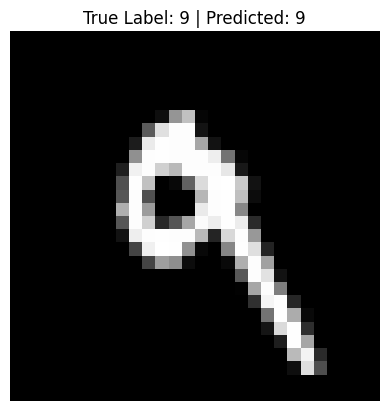

In [18]:
index = 7
image = X_test[index]
true_label = y_test[index]

# Predict
prediction = cnn_model.predict(image.reshape(1, 28, 28, 1))
predicted_label = np.argmax(prediction)

# Display image
plt.imshow(image.reshape(28, 28), cmap="gray")
plt.title(f"True Label: {true_label} | Predicted: {predicted_label}")
plt.axis("off")
plt.show()